<a href="https://colab.research.google.com/github/raj-vijay/dl/blob/master/9_Model_Optimization_and_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [ ]:
!wget https://assets.datacamp.com/production/repositories/654/datasets/92b75b9bc0c0a8a30999d76f4a1ee786ef072a9c/titanic_all_numeric.csv

--2020-05-22 20:04:19--  https://assets.datacamp.com/production/repositories/654/datasets/92b75b9bc0c0a8a30999d76f4a1ee786ef072a9c/titanic_all_numeric.csv
Resolving assets.datacamp.com (assets.datacamp.com)... 13.226.45.82, 13.226.45.81, 13.226.45.40, ...
Connecting to assets.datacamp.com (assets.datacamp.com)|13.226.45.82|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31708 (31K)
Saving to: ‘titanic_all_numeric.csv’

titanic_all_numeric 100%[===================>]  30.96K  --.-KB/s    in 0.01s   

2020-05-22 20:04:19 (2.15 MB/s) - ‘titanic_all_numeric.csv’ saved [31708/31708]



In [ ]:
df = pd.read_csv('titanic_all_numeric.csv')

In [ ]:
df.head()

,survived,pclass,age,sibsp,parch,fare,male,age_was_missing,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
0,0,3,22.0,1,0,7.2500,1,False,0,0,1
1,1,1,38.0,1,0,71.2833,0,False,1,0,0
2,1,3,26.0,0,0,7.9250,0,False,0,0,1
3,1,1,35.0,1,0,53.1000,0,False,0,0,1
4,0,3,35.0,0,0,8.0500,1,False,0,0,1


In [ ]:
predictors = np.array(df.drop('survived', axis = 1))

In [ ]:
def get_new_model():
  model = Sequential()
  model.add(Dense(100, activation='relu', input_shape = (10,)))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(2, activation='softmax'))
  return(model)

In [ ]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
# Convert the target to categorical: target
target = to_categorical(df.survived)

# Set up the model
model = Sequential()

# Add the first layer
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))

# Add the output layer
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model
model.fit(predictors, target)

Epoch 1/1
891/891 [==============================] - 0s 245us/step - loss: 2.7903 - accuracy: 0.5993


In [ ]:
from keras.models import load_model
model.save('model_file.h5')

In [ ]:
my_model = load_model('model_file.h5')

In [ ]:
pred_data = predictors

In [ ]:
lr_to_test = [.000001, 0.01, 1]

In [ ]:
input_shape=(n_cols,)
print(input_shape)

(10,)


In [ ]:
# Import the SGD optimizer
from keras.optimizers import SGD

# Create list of learning rates: lr_to_test
lr_to_test = [.000001, 0.01, 1]

# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Build new model to test, unaffected by previous models
    model = get_new_model()
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(lr=lr)
    
    # Compile the model
    model.compile(optimizer=my_optimizer, loss='categorical_crossentropy')
    
    # Fit the model
    model.fit(predictors, target)



Testing model with learning rate: 0.000001

Epoch 1/1
891/891 [==============================] - 0s 90us/step - loss: 0.7265


Testing model with learning rate: 0.010000

Epoch 1/1
891/891 [==============================] - 0s 69us/step - loss: 1.4052


Testing model with learning rate: 1.000000

Epoch 1/1
891/891 [==============================] - 0s 69us/step - loss: 333444.3378


**Evaluating model accuracy on validation dataset**

In [ ]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
hist = model.fit(predictors, target, validation_split=0.3)


Train on 623 samples, validate on 268 samples
Epoch 1/1
623/623 [==============================] - 0s 195us/step - loss: 0.6768 - accuracy: 0.6565 - val_loss: 0.6560 - val_accuracy: 0.6791


**Early stopping: Optimizing the optimization**

Early stopping helps to stop optimization when it isn't helping any more. 

Since the optimization stops automatically when it isn't helping, it is possible to set a high value for epochs during .fit()

In [ ]:
# Import EarlyStopping
from keras.callbacks import EarlyStopping

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Fit the model
model.fit(predictors, target, epochs=30, validation_split=0.3, callbacks=[early_stopping_monitor])


Train on 623 samples, validate on 268 samples
Epoch 1/30
623/623 [==============================] - 0s 200us/step - loss: 1.5365 - accuracy: 0.5762 - val_loss: 0.8176 - val_accuracy: 0.6903
Epoch 2/30
623/623 [==============================] - 0s 56us/step - loss: 1.0180 - accuracy: 0.6180 - val_loss: 0.6599 - val_accuracy: 0.6679
Epoch 3/30
623/623 [==============================] - 0s 54us/step - loss: 0.7936 - accuracy: 0.6196 - val_loss: 0.6540 - val_accuracy: 0.6567
Epoch 4/30
623/623 [==============================] - 0s 56us/step - loss: 0.6714 - accuracy: 0.6774 - val_loss: 0.6122 - val_accuracy: 0.6679
Epoch 5/30
623/623 [==============================] - 0s 54us/step - loss: 0.6145 - accuracy: 0.6838 - val_loss: 0.5993 - val_accuracy: 0.6791
Epoch 6/30
623/623 [==============================] - 0s 54us/step - loss: 0.5807 - accuracy: 0.6854 - val_loss: 0.5165 - val_accuracy: 0.7388
Epoch 7/30
623/623 [==============================] - 0s 57us/step - loss: 0.5944 - accuracy: 0

**Experimenting with wider networks**

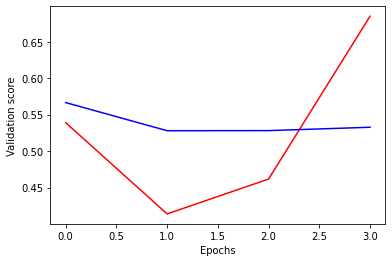

In [ ]:
import matplotlib.pyplot as plt

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Create the new model: model_2
model_2 = Sequential()

# Add the first and second layers
model_2.add(Dense(100, activation='relu', input_shape=input_shape))
model_2.add(Dense(100, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model_1
model_1_training = model.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Fit model_2
model_2_training = model_2.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()


**Adding layers to a network**

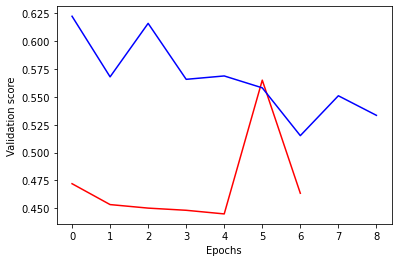

In [ ]:
# The input shape to use in the first hidden layer
input_shape = (n_cols,)

# Create the new model: model_2
model_2 = Sequential()

# Add the first, second, and third hidden layers
model_2.add(Dense(50, activation='relu', input_shape=input_shape))
model_2.add(Dense(50, activation='relu'))
model_2.add(Dense(50, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model 1
model_1_training = model.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Fit model 2
model_2_training = model_2.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()
